In [1]:
from michigrad.engine import Value
from michigrad.visualize import show_graph

In [2]:
import importlib
import michigrad.nn
import random
importlib.reload(michigrad.nn)
from michigrad.nn import Neuron, Layer, MLP

# Se definen los datos de entrada y datos de salida

xs = [[Value(0), Value(0)], [Value(0), Value(1)], [Value(1), Value(0)], [Value(1), Value(1)]]
ys = [Value(0), Value(1), Value(1), Value(0)]

# Se utiliza una seed para que los resultados puedan ser reproducidos varias veces

random.seed(32)

# Se utiliza la funcion tanh como función de activación
model = MLP(2, [2, 1], nonlin="tanh")

In [3]:
lr = 0.01
epochs = 10000

# Iteramos 10000 veces

for _ in range(epochs):

    # Forward pass

    yhats = [model(x) for x in xs] 

    # loss (testear si a cada iteración disminuye)
    # calcula el mse de cada combinación del zip
    # divide por 4 para tener el promedio  
    L = sum([(y - yhat)**2 for y, yhat in zip(ys, yhats)])/4

    # zero grad
    for p in model.parameters():
        p.grad = 0.0

    # backward pass
    L.backward()

    # update weights
    for p in model.parameters():
        p.data -= p.grad * lr

    print(L.data)

0.4678318702315097
0.4572226658684314
0.4472256234154999
0.4378042027712489
0.42892409571844453
0.4205530811476046
0.4126608909509539
0.4052190856392297
0.39820093883420704
0.3915813298783392
0.3853366438810003
0.3794446785897906
0.3738845575363538
0.3686366489601497
0.3636824900614888
0.35900471617762375
0.3545869945134501
0.3504139620919855
0.3464711676197584
0.34274501698898835
0.33922272216236377
0.3358922532076534
0.3327422932686155
0.32976219627595377
0.32694194721763836
0.3242721248019547
0.32174386635934243
0.3193488348405902
0.31707918777939303
0.3149275480967748
0.3128869766335333
0.31095094630476766
0.3091133177777814
0.3073683165812833
0.3057105115598992
0.30413479459361903
0.30263636150696466
0.3012106940974531
0.299853543217336
0.29856091284670655
0.2973290450998607
0.2961544061103417
0.2950336727433901
0.2939637200875924
0.2929416096803927
0.2919645784248072
0.2910300281571959
0.2901355158282913
0.2892787442618884
0.28845755345766916
0.28766991240657147
0.286913911388941

In [4]:
for x, y_true in zip(xs, ys):
    y_pred = model(x).data
    y_red = round(y_pred)

    print([xi.data for xi in x], "->", y_pred, "(redondeado:", y_red, "| esperado:", y_true.data, ")")


[0, 0] -> 0.00012375582856205547 (redondeado: 0 | esperado: 0 )
[0, 1] -> 0.9998496099337062 (redondeado: 1 | esperado: 1 )
[1, 0] -> 0.9998493008460952 (redondeado: 1 | esperado: 1 )
[1, 1] -> 0.000267332691017641 (redondeado: 0 | esperado: 0 )


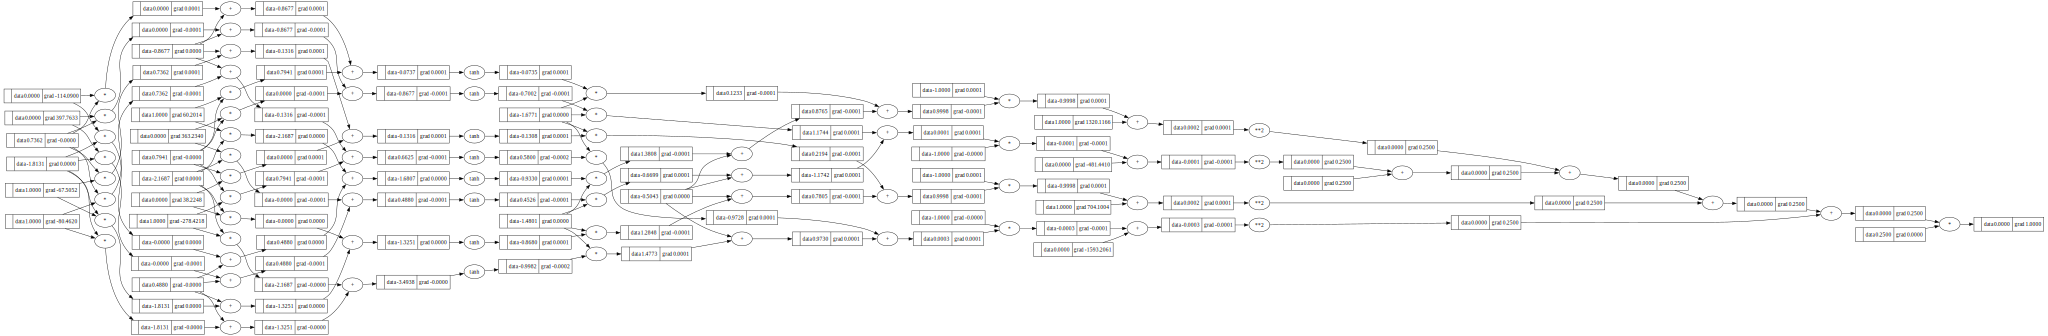

In [5]:
show_graph(L)